In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Rectangle

import plotly as py
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#import plotly.io as pio
#pio.renderers.default = "browser"




import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output

pd.set_option("display.max_columns", None)
defending = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_match/defense.csv")
szn_defending = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_season/defense.csv")
passing = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_season/passing.csv")
pass_type = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_season/passing_types.csv")
szn_misc = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_season/misc.csv")
matchday = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/team_match/defense.csv")
misc =  pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_match/misc.csv")

shooting = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_season/shooting.csv")



defending_df = pd.DataFrame(defending)
szn_defending_df = pd.DataFrame(szn_defending)
passing_df = pd.DataFrame(passing)
pass_type_df = pd.DataFrame(pass_type)
matchday_df = pd.DataFrame(matchday)
misc_df = pd.DataFrame(misc)
shooting_df = pd.DataFrame(shooting)

fpl = pd.read_csv("../data/processed/fpl/2025-2026/gws/merged_gws.csv")

fpl_df = pd.DataFrame(fpl)


#add matchday to defending_df
defending_df = defending_df.merge(misc_df[['player_id', 'game_id', 'recov']], left_on=['player_id', 'game_id'], right_on=['player_id', 'game_id'], how='left')
defending_df = defending_df.merge(matchday_df[['round', 'game_id']], left_on='game_id', right_on='game_id', how='left')

#drop duplicate rows by name and game
defending_df = defending_df.drop_duplicates(subset=['player_id', 'game_id'])



In [2]:
#Create defcomp column
defending_df['defcon'] = defending_df['tkl_int'] + defending_df['blocks'] + defending_df['clr']
defending_df.head()





,league,season,game,team,player,jersey_number,nation,pos,age,min,tkl,tklw,def_3rd,mid_3rd,att_3rd,tkl_tkl,att,challenges_tkl,lost,blocks,sh,pass,int,tkl_int,clr,err,game_id,game_date,home,away,player_id,team_id,is_promoted,is_home,is_away,opponent_id,position,fpl_pos,is_relegated,position_detail,recov,round,defcon
0,ENG-Premier League,2025-2026,2025-08-15 Liverpool-Bournemouth,BOU,Adam Smith,15,ENG,RB,34,89,1,0,0,1,0,0,0,NaN,0,0,0,0,1,2,7,0,a071faa8,2025-08-15,LIV,BOU,8c76756e,56f0abca,0,0,1,259f237e,DEF,DEF,0,FB,2,Matchweek 1,9
2,ENG-Premier League,2025-2026,2025-08-15 Liverpool-Bournemouth,BOU,Adrien Truffert,3,FRA,LB,23,90,2,2,1,0,1,1,1,100.0,0,1,1,0,0,2,3,0,a071faa8,2025-08-15,LIV,BOU,c6810ee5,56f0abca,0,0,1,259f237e,DEF,DEF,0,UNK,4,Matchweek 1,6
4,ENG-Premier League,2025-2026,2025-08-15 Liverpool-Bournemouth,BOU,Alex Scott,8,ENG,CM,21,73,0,0,0,0,0,0,0,NaN,0,0,0,0,1,1,0,0,a071faa8,2025-08-15,LIV,BOU,3bb5fbe3,56f0abca,0,0,1,259f237e,MID,MID,0,DM,2,Matchweek 1,1
6,ENG-Premier League,2025-2026,2025-08-15 Liverpool-Bournemouth,BOU,Antoine Semenyo,24,GHA,RM,25,90,1,1,1,0,0,0,0,NaN,0,3,0,3,1,2,0,0,a071faa8,2025-08-15,LIV,BOU,77ba57bf,56f0abca,0,0,1,259f237e,MID,MID,0,W,3,Matchweek 1,5
8,ENG-Premier League,2025-2026,2025-08-15 Liverpool-Bournemouth,BOU,Bafodé Diakité,18,FRA,CB,24,90,2,2,2,0,0,2,2,100.0,0,1,0,1,1,3,6,0,a071faa8,2025-08-15,LIV,BOU,87925a1b,56f0abca,0,0,1,259f237e,DEF,DEF,0,UNK,8,Matchweek 1,10


In [3]:

#filter the top 20 defensive contributions
midfielders = defending_df[defending_df['position'] == 'MID']
fpl_mids = fpl_df[fpl_df['position'] == 'MID']
players = midfielders.sort_values(by='defcon', ascending=False).head(30)

szn_mids = szn_defending_df[szn_defending_df['position'] == 'MID']
szn_mids = szn_mids.merge(szn_misc[['player_id', 'recov']], left_on='player_id', right_on='player_id', how='left')

szn_mids = szn_mids[szn_mids['90s'] > 5]
szn_mids['recov/90'] = szn_mids['recov'] / szn_mids['90s']
szn_mids['tkl_int/90'] = szn_mids['tkl_int'] / szn_mids['90s'] 






mid_defcon = midfielders['defcon'] + midfielders['recov']
midfielders['defcon'] = mid_defcon

display(midfielders)
print(players[['player', 'defcon', 'round']])

C:\Users\oukan\AppData\Local\Temp\ipykernel_26816\690432188.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,league,season,game,team,player,jersey_number,nation,pos,age,min,tkl,tklw,def_3rd,mid_3rd,att_3rd,tkl_tkl,att,challenges_tkl,lost,blocks,sh,pass,int,tkl_int,clr,err,game_id,game_date,home,away,player_id,team_id,is_promoted,is_home,is_away,opponent_id,position,fpl_pos,is_relegated,position_detail,recov,round,defcon
4,ENG-Premier League,2025-2026,2025-08-15 Liverpool-Bournemouth,BOU,Alex Scott,8,ENG,CM,21,73,0,0,0,0,0,0,0,NaN,0,0,0,0,1,1,0,0,a071faa8,2025-08-15,LIV,BOU,3bb5fbe3,56f0abca,0,0,1,259f237e,MID,MID,0,DM,2,Matchweek 1,3
6,ENG-Premier League,2025-2026,2025-08-15 Liverpool-Bournemouth,BOU,Antoine Semenyo,24,GHA,RM,25,90,1,1,1,0,0,0,0,NaN,0,3,0,3,1,2,0,0,a071faa8,2025-08-15,LIV,BOU,77ba57bf,56f0abca,0,0,1,259f237e,MID,MID,0,W,3,Matchweek 1,8
10,ENG-Premier League,2025-2026,2025-08-15 Liverpool-Bournemouth,BOU,Ben Winterburn,47,ENG,CM,20,7,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,a071faa8,2025-08-15,LIV,BOU,643aca04,56f0abca,0,0,1,259f237e,MID,MID,0,AM,0,Matchweek 1,0
12,ENG-Premier League,2025-2026,2025-08-15 Liverpool-Bournemouth,BOU,David Brooks,7,WAL,LM,28,83,2,2,0,1,1,0,4,0.0,4,0,0,0,0,2,0,0,a071faa8,2025-08-15,LIV,BOU,a888d251,56f0abca,0,0,1,259f237e,MID,MID,0,WM,5,Matchweek 1,7
24,ENG-Premier League,2025-2026,2025-08-15 Liverpool-Bournemouth,BOU,Marcus Tavernier,16,ENG,"CM,DM",26,90,3,3,0,2,1,1,1,100.0,0,0,0,0,1,4,6,0,a071faa8,2025-08-15,LIV,BOU,1be64912,56f0abca,0,0,1,259f237e,MID,MID,0,W,10,Matchweek 1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12726,ENG-Premier League,2025-2026,2026-01-08 Arsenal-Liverpool,LIV,Alexis Mac Allister,10,ARG,DM,27,90,1,0,1,0,0,1,3,33.3,2,0,0,0,1,2,3,0,2b794de5,2026-01-08,ARS,LIV,23804164,259f237e,0,0,1,1dd1f33c,MID,MID,0,DM,5,Matchweek 21,10
12730,ENG-Premier League,2025-2026,2026-01-08 Arsenal-Liverpool,LIV,Cody Gakpo,18,NED,LW,26,90,0,0,0,0,0,0,1,0.0,1,0,0,0,0,0,3,0,2b794de5,2026-01-08,ARS,LIV,2b5a53c9,259f237e,0,0,1,1dd1f33c,MID,MID,0,W,3,Matchweek 21,6
12734,ENG-Premier League,2025-2026,2026-01-08 Arsenal-Liverpool,LIV,Dominik Szoboszlai,8,HUN,AM,25,90,0,0,0,0,0,0,0,NaN,0,1,0,1,2,2,0,0,2b794de5,2026-01-08,ARS,LIV,59581b91,259f237e,0,0,1,1dd1f33c,MID,MID,0,AM,1,Matchweek 21,4
12736,ENG-Premier League,2025-2026,2026-01-08 Arsenal-Liverpool,LIV,Florian Wirtz,7,GER,FW,22,90,1,1,0,1,0,1,1,100.0,0,1,0,1,0,1,0,0,2b794de5,2026-01-08,ARS,LIV,86111fa8,259f237e,0,0,1,1dd1f33c,MID,MID,0,UNK,4,Matchweek 21,6


                   player  defcon         round
7856         Mats Wieffer      22  Matchweek 13
9050     Mateus Fernandes      19  Matchweek 15
848       Yehor Yarmoliuk      16   Matchweek 2
11724     Florentino Luís      16  Matchweek 20
8560   Soungoutou Magassa      15  Matchweek 14
26            Tyler Adams      15   Matchweek 1
11224        James Garner      15  Matchweek 19
3470     Marshall Munetsi      15   Matchweek 6
4814        João Palhinha      15   Matchweek 8
12678         Lewis Miley      15  Matchweek 21
11958            Casemiro      15  Matchweek 20
1056         Mats Wieffer      14   Matchweek 2
3296      Florentino Luís      14   Matchweek 6
3400         Granit Xhaka      14   Matchweek 6
136          Mats Wieffer      14   Matchweek 1
6894        Andrey Santos      14  Matchweek 12
2914                Rodri      14   Matchweek 5
8054        Matheus Nunes      13  Matchweek 14
5006   Dominik Szoboszlai      13   Matchweek 9
3290       Sean Longstaff      13   Matc

In [4]:
rice = midfielders[midfielders['player'] == 'Declan Rice']
caicedo = midfielders[midfielders['player'] == 'Moisés Caicedo']

In [5]:

# combine all conditions (or chain filters on 'forwards' instead)
forwards = shooting_df[
    (shooting_df['position'] == 'FWD') &
    (shooting_df['gls'] > 0) &
    (shooting_df['npxg'] > 0) &
    (shooting_df['xg'] > 0)
]
forwards[['position']].value_counts()

position
FWD         77
Name: count, dtype: int64

C:\Users\oukan\AppData\Local\Temp\ipykernel_26816\2646877470.py:105: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<Figure size 640x480 with 0 Axes>

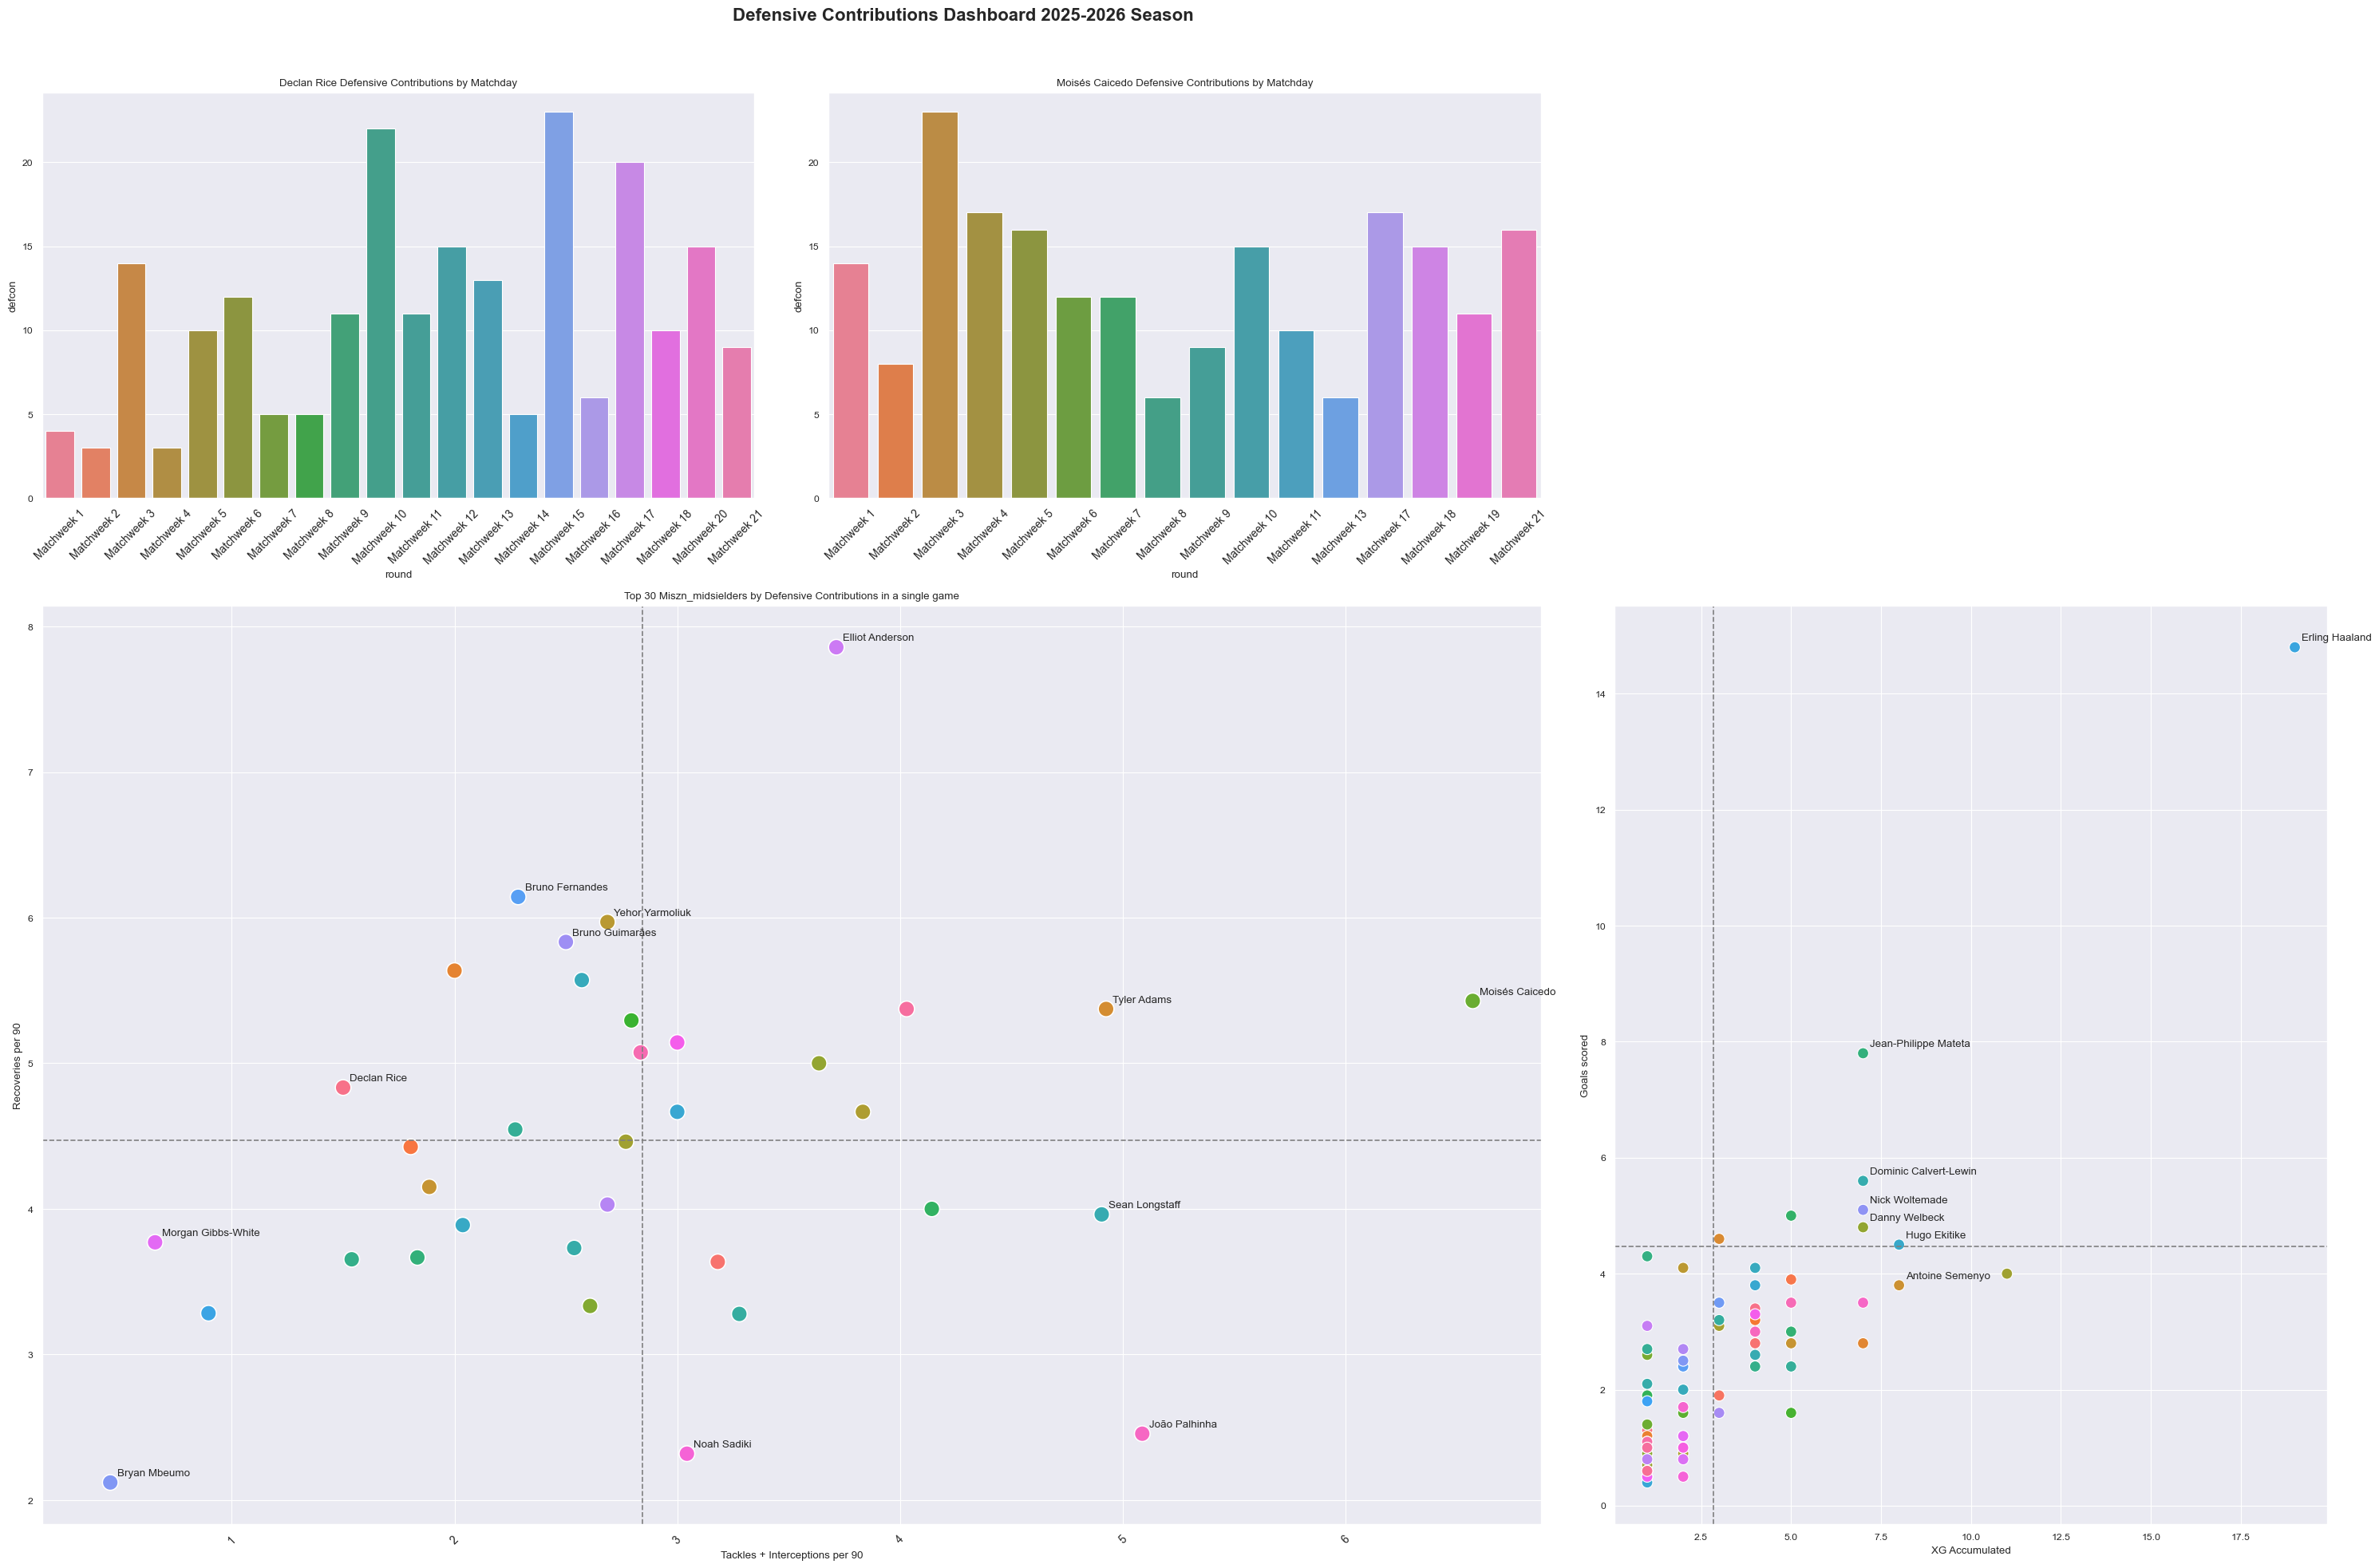

In [6]:
# Chart of Most defensive contributions this season and the matchday they were made in

x_2024_med = szn_mids["tkl_int/90"].mean()
y_2024_med = szn_mids["recov/90"].mean()

regions = [
    ("Low Carries • Low Prog Dist",    (0.15, 0.15)),  # bottom-left
    ("Low Carries • High Prog Dist", (0.15, 0.85)),  # top-left
    ("High Carries • High Prog Dist",  (0.85, 0.85)),  # top-right
    ("High Carries • Low Prog Dist",   (0.85, 0.15)),  # bottom-right
]


#Styling the scatter plot
sns.set_theme(
    style="darkgrid",
    context="paper",
    palette="colorblind"
    )
#sns.set_style("ticks")
sns.despine()
fig = plt.figure(figsize=(30, 20))

ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=1)
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=1)
ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax4 = plt.subplot2grid((3, 3), (1, 2), colspan=2, rowspan=2)

# create two subplots (axes array) so ax[0] and ax[1] are valid
#fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(30, 20), sharey=True)
fig.suptitle("Defensive Contributions Dashboard 2025-2026 Season", fontsize=16, fontweight='bold', ha='right')

sns.barplot(data=rice, x='round', y='defcon', hue="round", ax=ax1)
ax1.set_title("Declan Rice Defensive Contributions by Matchday")
# rotate x tick labels correctly
ax1.tick_params(axis='x', rotation=45, labelsize=10, direction='out')

sns.barplot(data=caicedo, x='round', y='defcon', hue="round", ax=ax2)
ax2.set_title("Moisés Caicedo Defensive Contributions by Matchday")
ax2.tick_params(axis='x', rotation=45, labelsize=10, direction='out')

#Scatterplot of the different archetypes of miszn_midsielders

sns.scatterplot(data=szn_mids, x='tkl_int/90', y='recov/90', hue="player", s=200, ax=ax3, legend=False)
ax3.set_title("Top 30 Miszn_midsielders by Defensive Contributions in a single game")
ax3.tick_params(axis='x', rotation=45, labelsize=10, direction='out')
ax3.axvline(x=x_2024_med, color='grey', linestyle='--')
ax3.axhline(y=y_2024_med, color='grey', linestyle='--')
ax3.set_xlabel("Tackles + Interceptions per 90")
ax3.set_ylabel("Recoveries per 90")

# 1) thresholds (example for axis-based)
x90 = szn_mids["tkl_int/90"].quantile(0.90)
y90 = szn_mids["recov/90"].quantile(0.90)
x05 = szn_mids["tkl_int/90"].quantile(0.05)
y05 = szn_mids["recov/90"].quantile(0.05)

top_mask = (szn_mids["tkl_int/90"] >= x90) | (szn_mids["recov/90"] >= y90)
bot_mask = (szn_mids["tkl_int/90"] <= x05) | (szn_mids["recov/90"] <= y05)

auto_mask = top_mask | bot_mask

# --- Manual "must label" players (you choose these) ---
must_label = {"Rodri", "Declan Rice", "Moisés Caicedo"}  # example
manual_mask = szn_mids["player"].isin(must_label)

# --- Combined mask: label if auto standout OR manually selected ---
label_mask = auto_mask | manual_mask
standouts = szn_mids[label_mask].copy()

# 3) annotate just those points
for _, r in standouts.iterrows():
    ax3.annotate(
        r["player"],
        (r["tkl_int/90"], r["recov/90"]),
        textcoords="offset points",
        xytext=(6, 6),   # small offset so label doesn't sit on the dot
        ha="left"
    )


sns.scatterplot(data=forwards, x='gls', y='npxg', hue="player", s=100, ax=ax4, legend=False)
ax4.axvline(x=x_2024_med, color='grey', linestyle='--')
ax4.axhline(y=y_2024_med, color='grey', linestyle='--')
ax4.set_xlabel("XG Accumulated")
ax4.set_ylabel("Goals scored")

# 1) thresholds (example for axis-based)
x90 = forwards["gls"].quantile(0.90)
y90 = forwards["npxg"].quantile(0.90)
x05 = forwards["gls"].quantile(0.05)
y05 = forwards["npxg"].quantile(0.05)

top_mask = (forwards["gls"] >= x90) & (forwards["npxg"] >= y90)
#bot_mask = (forwards["gls"] <= x05) & (forwards["npxg"] <= y05)

auto_mask = top_mask | bot_mask

# --- Manual "must label" players (you choose these) ---
must_label = {"Antoine Semenyo", "Erling Haaland"}  # example
manual_mask = forwards["player"].isin(must_label)

# --- Combined mask: label if auto standout OR manually selected ---
label_mask = auto_mask | manual_mask
standouts = forwards[label_mask].copy()

# 3) annotate just those points
for _, r in standouts.iterrows():
    ax4.annotate(
        r["player"],
        (r["gls"], r["npxg"]),
        textcoords="offset points",
        xytext=(6, 6),   # small offset so label doesn't sit on the dot
        ha="left"
    )
    
plt.tight_layout(rect=(0, 0, 1, 0.96))







C:\Users\oukan\AppData\Local\Temp\ipykernel_26816\2578957968.py:36: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<Figure size 640x480 with 0 Axes>

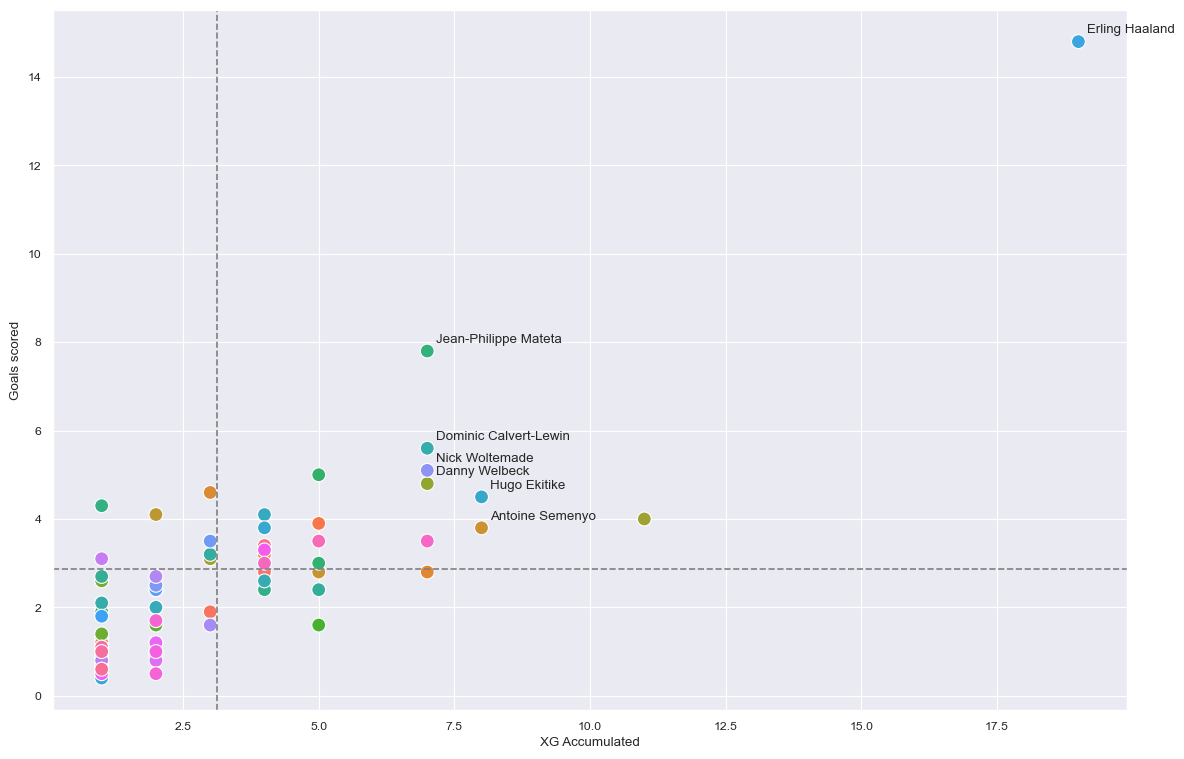

In [7]:

x_2024_med = forwards["gls"].mean()
y_2024_med = forwards["xg"].mean()

sns.set_theme(
    style="darkgrid",
    context="paper",
    palette="colorblind"
    )
#sns.set_style("ticks")
sns.despine()
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(data=forwards, x='gls', y='npxg', hue="player", s=100, ax=ax, legend=False)
ax.axvline(x=x_2024_med, color='grey', linestyle='--')
ax.axhline(y=y_2024_med, color='grey', linestyle='--')
ax.set_xlabel("XG Accumulated")
ax.set_ylabel("Goals scored")

# 1) thresholds (example for axis-based)
x90 = forwards["gls"].quantile(0.90)
y90 = forwards["npxg"].quantile(0.90)
x05 = forwards["gls"].quantile(0.05)
y05 = forwards["npxg"].quantile(0.05)

top_mask = (forwards["gls"] >= x90) & (forwards["npxg"] >= y90)
#bot_mask = (forwards["gls"] <= x05) & (forwards["npxg"] <= y05)

auto_mask = top_mask | bot_mask

# --- Manual "must label" players (you choose these) ---
must_label = {"Antoine Semenyo", "Erling Haaland"}  # example
manual_mask = forwards["player"].isin(must_label)

# --- Combined mask: label if auto standout OR manually selected ---
label_mask = auto_mask | manual_mask
standouts = forwards[label_mask].copy()

# 3) annotate just those points
for _, r in standouts.iterrows():
    ax.annotate(
        r["player"],
        (r["gls"], r["npxg"]),
        textcoords="offset points",
        xytext=(6, 6),   # small offset so label doesn't sit on the dot
        ha="left"
    )

plt.tight_layout(rect=(0, 0, 1, 0.96))

In [8]:
#creating a new column called ppda (passes completed per opponent defensive action)

#The Data
matchday = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/team_match/defense.csv")
passing = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/team_match/passing.csv")
matchday_df = pd.DataFrame(matchday)
passing_df = pd.DataFrame(passing)

passing_df.rename(columns={'cmp':'pass_cmp'}, inplace=True)
#merge the two dataframes on team and game id
ppda_df = matchday_df.merge(passing_df[['team', 'game_id',"pass_cmp"]], left_on=['team', 'game_id'], right_on=['team', 'game_id'], how='left')

#for each game, locate the opponents defensive actions
ppda_df['tkl'] = ppda_df['tkl'].fillna(0)
ppda_df['int'] = ppda_df['int'].fillna(0)
ppda_df['clr'] = ppda_df['clr'].fillna(0)
ppda_df['blocks'] = ppda_df['blocks'].fillna(0)

ppda_df['def_actions'] = ppda_df['tkl'] + ppda_df['int'] + ppda_df['clr'] + ppda_df['blocks']

opponent = ppda_df[['team', 'game_id', 'def_actions', 'pass_cmp']].copy()
opponent.rename(columns={'team':'opponnent', 'def_actions':'opp_def_actions', 'pass_cmp':'opp_cmp'}, inplace=True)

ppda_df = ppda_df.merge(opponent, on='game_id', how='left')


ppda_df = ppda_df[ppda_df['team'] != ppda_df['opponnent']]


ppda_df['PRI'] = ppda_df['pass_cmp'] / ppda_df['opp_def_actions'] #Press Resistance Index (passes completed per opponent defensive action)
ppda_df['ppda'] = ppda_df['opp_cmp'] / ppda_df['def_actions'] #Passes allowed per defensive action (PPDA)

team = ppda_df[ppda_df['team'] == 'BOU']
#display(team[['team', "opponnent", 'round', 'game_id', 'ppda', 'PRI','pass_cmp', 'opp_cmp', 'def_actions', 'opp_def_actions' ]])


#Total of opp cmp and opp_def_actions for each team 
team_totals = ppda_df.groupby('opponnent').agg({'opp_cmp':'sum', 'opp_def_actions':'sum'}).reset_index()
team_totals['ppda'] = team_totals['opp_cmp'] / team_totals['opp_def_actions']
team_totals = team_totals.sort_values(by='opp_cmp', ascending=False)
display(team_totals)


,opponnent,opp_cmp,opp_def_actions,ppda
12,MCI,11040,1161,9.509044
11,LIV,10521,1214,8.666392
6,CHE,9802,1221,8.027846
0,ARS,9284,1151,8.066030
9,FUL,8859,1380,6.419565
2,BHA,8668,1291,6.714175
14,NEW,8556,1271,6.731707
13,MUN,8509,1342,6.340537
1,AVL,8298,1150,7.215652
15,NFO,8088,1281,6.313817


In [9]:
fig = px.scatter(team, x='PRI', y='ppda', color="opponnent", title="Arsenal PPDA vs PRI by Matchday 2025-2026 Season", labels={'ppda': 'PPDA (Passes Allowed per Defensive Action)', 'PRI': 'Passes Completed per Opp Defensive Action'})
fig.show()

In [10]:
# --- Load ---
matchday_df = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/team_match/defense.csv")
passing_df  = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/team_match/passing.csv")

# --- Keep only what you need + rename ---
passing_df = passing_df.rename(columns={"cmp": "pass_cmp"})

ppda_df = matchday_df.merge(
    passing_df[["team", "game_id", "pass_cmp"]],
    on=["team", "game_id"],
    how="left",
    validate="one_to_one"  # IMPORTANT: fails fast if you accidentally have duplicates
)

# --- Defensive actions (fill missing -> 0) ---
for c in ["tkl", "int", "clr", "blocks"]:
    if c not in ppda_df.columns:
        raise KeyError(f"Missing required column: {c}")
    ppda_df[c] = pd.to_numeric(ppda_df[c], errors="coerce").fillna(0)

ppda_df["pass_cmp"] = pd.to_numeric(ppda_df["pass_cmp"], errors="coerce").fillna(0)
ppda_df["def_actions"] = ppda_df["tkl"] + ppda_df["int"]

# --- Invariant: exactly 2 teams per game_id ---
counts = ppda_df.groupby("game_id")["team"].nunique()
bad = counts[counts != 2]
if not bad.empty:
    raise ValueError(f"Expected exactly 2 teams per game_id. Bad game_ids (sample): {bad.index.tolist()[:10]}")

# --- Opponent mapping via self-merge ---
opp = ppda_df[["game_id", "team", "def_actions", "pass_cmp"]].copy()
opp = opp.rename(columns={
    "team": "opponnent",
    "def_actions": "opp_def_actions",
    "pass_cmp": "opp_cmp"
})

ppda_df = ppda_df.merge(opp, on="game_id", how="left")

# keep only the "other team" row
ppda_df = ppda_df[ppda_df["team"] != ppda_df["opponnent"]].copy()

# --- Per-match metrics ---
# PRI: passes completed per opponent defensive action (your "press resistance index")
ppda_df["PRI"] = np.where(ppda_df["opp_def_actions"] > 0,
                          ppda_df["pass_cmp"] / ppda_df["opp_def_actions"],
                          np.nan)

# PPDA proxy: opponent passes completed per your defensive action
ppda_df["ppda"] = np.where(ppda_df["def_actions"] > 0,
                           ppda_df["opp_cmp"] / ppda_df["def_actions"],
                           np.nan)

# --- Season totals per team (THIS is what you meant) ---
team_totals = (
    ppda_df.groupby("team", as_index=False)
    .agg(
        pass_cmp_sum=("pass_cmp", "sum"),
        opp_cmp_sum=("opp_cmp", "sum"),
        def_actions_sum=("def_actions", "sum"),
        opp_def_actions_sum=("opp_def_actions", "sum"),
        matches=("game_id", "nunique"),
    )
)

team_totals["PRI"] = np.where(team_totals["opp_def_actions_sum"] > 0,
                              team_totals["pass_cmp_sum"] / team_totals["opp_def_actions_sum"],
                              np.nan)

team_totals["ppda"] = np.where(team_totals["def_actions_sum"] > 0,
                               team_totals["opp_cmp_sum"] / team_totals["def_actions_sum"],
                               np.nan)

team_totals = team_totals.sort_values("ppda", ascending=True)  # lower ppda = more intense pressing
display(team_totals)




,team,pass_cmp_sum,opp_cmp_sum,def_actions_sum,opp_def_actions_sum,matches,PRI,ppda
6,CHE,9802,6836,550,568,21,17.257042,12.429091
13,MUN,8509,6988,556,544,21,15.641544,12.568345
3,BOU,7392,7101,551,524,21,14.106870,12.887477
17,TOT,7602,7347,564,578,21,13.152249,13.026596
0,ARS,9284,6318,479,473,21,19.627907,13.189979
2,BHA,8668,7834,564,602,21,14.398671,13.890071
11,LIV,10521,6092,407,527,21,19.963947,14.968059
12,MCI,11040,7156,475,614,21,17.980456,15.065263
19,WOL,6977,9061,596,488,21,14.297131,15.203020
15,NFO,8088,8101,530,543,21,14.895028,15.284906


In [11]:
fig = px.scatter(
    team_totals,
    x='ppda', 
    y='PRI',
    text='team',
    title="Premier League PPDA vs Build-Up for 2025-2026 Season", 
    labels={'ppda': 'PPDA (Passes Allowed per Defensive Action)', 'PRI': 'Passes Completed per Opp Defensive Action'}
    )
fig.update_traces(showlegend=False, name='team', textposition='top center', marker_size=10)

#add median lines
hmean = team_totals['ppda'].mean()
vmean = team_totals['PRI'].mean()

hmax = team_totals['ppda'].max()
vmax = team_totals['PRI'].max()

hmin = team_totals['ppda'].min()
vmin = team_totals['PRI'].min()



x_mean = team_totals["ppda"].mean()
y_mean = team_totals["PRI"].mean()

x_min, x_max = team_totals["ppda"].min(), team_totals["ppda"].max()
y_min, y_max = team_totals["PRI"].min(), team_totals["PRI"].max()

fig.add_vline(x=x_mean, line_dash="dash", line_color="#00FF41", line_width=1)
fig.add_hline(y=y_mean, line_dash="dash", line_color="#00FF41", line_width=0.5)


# Quadrant rectangles (use shapes)
def add_quad(x0, x1, y0, y1, color, opacity):
    fig.add_shape(
        type="rect",
        x0=x0, x1=x1, y0=y0, y1=y1,
        fillcolor=color, opacity=opacity,
        line_width=0, layer="below"
    )

add_quad(x_min, x_mean, y_min, y_mean, "#F1C40F", 0.18)   # low ppda, low pri
add_quad(x_min, x_mean, y_mean, y_max, "#2ECC71", 0.28)   # low ppda, high pri
add_quad(x_mean, x_max, y_mean, y_max, "#3498DB", 0.18)    # high ppda, high pri
add_quad(x_mean, x_max, y_min, y_mean, "#E74C3C", 0.18)   # high ppda, low pri

#Quadrant Labels
fig.add_annotation(
    x=x_min + (x_mean - x_min) / 2,
    y=y_min + (y_mean - y_min) / 4,
    text="Chaotic Pressers<br>",
    showarrow=False,
    font=dict(size=12, color="Beige"),
    align="center"
)

fig.add_annotation(
    x=x_min + (x_mean - x_min) / 2,
    y=y_max + (y_mean - y_max) / 2,
    text="Dominant Forces<br>",
    showarrow=False,
    font=dict(size=12, color="Beige"),
    align="center"
)

fig.add_annotation(
    x=x_max + (x_mean - x_max) / 2,
    y=y_max + (y_mean - y_max) / 2,
    text="Passive Controllers<br>",
    showarrow=False,
    font=dict(size=12, color="Beige"),
    align="center"
)

fig.add_annotation(
    x=x_max + (x_mean - x_max) / 2,
    y=y_min + (y_mean - y_min) / 2,
    text="Passive & Limited<br>",
    showarrow=False,
    font=dict(size=12, color="Beige"),
    align="center"
)




#Graph Layout
fig.update_layout(
    height=600,
    width=900,
     title=dict(
            font=dict(size=20, color="Beige"),
            text= "Premier League Pressing vs Build-Up for 2025-2026 Season",
            x=0.5
        ),
    legend = dict(
        title="Team"
        ),
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="Beige"
    ),
    margin=dict(l=40, r=40, t=60, b=40),
    paper_bgcolor="#0B0F0C", autosize=False, plot_bgcolor = '#0B0F0C',
    xaxis=dict(
        title="PPDA (Passes Allowed per Defensive Action)",
        showgrid=False,
        gridcolor='rgba(0,255,65,0.15)',
        zeroline=False,
        linecolor='Beige',
        tickcolor= 'Beige',
    ),

    yaxis=dict(
        title="PRI (Passes Completed per Opp Defensive Action)",
        showgrid=False,
        gridcolor='rgba(0,255,65,0.15)',
        zeroline=False,
        linecolor='Beige',
        tickcolor= 'Beige',
    )
        
)

#add caption at the bottom of the chart
fig.add_annotation(
        text="Data Source: FBref | @cartierkuti",
        xref="paper", yref="paper",
        x=0, y=-0.1,
        showarrow=False,
        font=dict(size=10, color="Beige"),
)


fig.show()

In [12]:
#Team Possession Efficiency Chart for Premier League 2025-2026 Season
#--- Load Data---
possession_df  = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/team_season/possession.csv")
passing_df  = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/team_season/passing.csv")
shooting_df  = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/team_season/shooting.csv")

# --- Keep only what you need + rename ---
passing_df = passing_df.rename(columns={"cmp": "pass_cmp", "1_3":"1_3pass", "totdist":"totpassdist", "prgdist":"prgpassdist"})
possession_df = possession_df.rename(columns={"1_3":"1_3carry", "totdist":"totcarrydist", "prgdist":"prgcarrydist"})
possession_df = pd.DataFrame(possession_df)
passing_df = pd.DataFrame(passing_df)
shooting_df = pd.DataFrame(shooting_df)


merged_df = possession_df.merge(
    passing_df[["team_id","pass_cmp", "xa", 'totpassdist', 'prgpassdist', 'short_cmp', 'att_att', 'medium_cmp',
       'medium_att', 'long_cmp', 'long_att', 'ast', 'xag', 'a_xag', 'kp',
       '1_3pass', 'ppa', 'crspa', 'prgp']], on=["team_id"], how="left",
    validate="one_to_one"  # IMPORTANT: fails fast if you accidentally
)

merged_df = merged_df.merge(
    shooting_df[["team_id",'gls', 'sh', 'sot',
       'sot_sot', 'sh_90', 'sot_90', 'g_sh', 'g_sot', 'dist', 'fk', 'pk',
       'pkatt', 'xg', 'npxg', 'npxg_sh', 'g_xg', 'np_g_xg']], on=["team_id"], how="left",
    validate="one_to_one"  # IMPORTANT: fails fast if you accidentally
)

merged_df.drop(columns=['players_used', 'is_relegated','url'], inplace=True)
merged_df.rename(columns={'succ_succ':'succ_pct', 'tkld_tkld':'tkld_pct','dist': 'sh_dist'}, inplace=True)

merged_df.dropna(inplace=True)
display(merged_df.columns)  

#---- Calculate possession efficiency metrics ----
merged_df['carry_pct'] = merged_df['prgcarrydist'] / merged_df['totcarrydist']
merged_df['pass_eff'] = merged_df['prgp'] / merged_df['pass_cmp']
merged_df['xG_100'] = merged_df['npxg'] / (merged_df['pass_cmp'] / 100) #npxg created per 100 passes

merged_df['cpa_90'] = merged_df['cpa'] / merged_df['90s']  #Carries into penalty area per 90
merged_df['ppa_90'] = merged_df['ppa'] / merged_df['90s']  #Passes into penalty area per 90
merged_df['pass_90'] = merged_df['pass_cmp'] / merged_df['90s']  #Key Passes per 90

merged_df['npxg_90'] = merged_df['npxg'] / merged_df['90s']  #Non-Penalty Expected Goals per 90

merged_df['pot_threat90'] = 100 *(merged_df['cpa_90'] + merged_df['ppa_90']) / merged_df['pass_90']  #Potential Threat per 90
merged_df['real_threat90'] = 100 * merged_df['npxg_90'] / merged_df['pass_90']  #Real Threat per 90
merged_df['pot_threat'] = 100 * (merged_df['cpa'] + merged_df['ppa']) / merged_df['pass_cmp']  #Potential Threat per 100 passes
merged_df['real_threat'] = 100 * merged_df['npxg'] / merged_df['pass_cmp']  #Real Threat per 100 passes


display(merged_df[['team', '90s', 'carry_pct', 'pass_90', 'pass_cmp', 'xG_100', 'pot_threat', 'pot_threat90', 'real_threat', 'real_threat90', "npxg_sh", 'sh_dist']].sort_values(by='real_threat', ascending=False))


#plot the chart

fig = px.scatter(
    merged_df,
    x='pot_threat', 
    y='real_threat',
    text='team',
    color='npxg_sh',
    title="Premier League Team Possession Efficiency 2025-2026 Season", 
    labels={'pot_threat': 'Potential Threat per 100 Passes', 'real_threat': 'Real Threat per 100 Passes'}
    )

#Graph Layout
fig.update_layout(
    height=600,
    width=900,
     title=dict(
            font=dict(size=20, color="Beige"),
            text= "Premier League Possession Efficiency for 2025-2026 Season",
            x=0.5
        ),
    legend = dict(
        title="Team"
        ),
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="Beige"
    ),
    margin=dict(l=40, r=40, t=60, b=40),
    paper_bgcolor="#0B0F0C", autosize=False, plot_bgcolor = '#0B0F0C',
    xaxis=dict(
        title="'pot_threat': 'Potential Threat per 100 Passes",
        showgrid=False,
        gridcolor='rgba(0,255,65,0.15)',
        zeroline=False,
        linecolor='Beige',
        tickcolor= 'Beige',
    ),

    yaxis=dict(
        title="'real_threat': 'Real Threat per 100 Passes",
        showgrid=False,
        gridcolor='rgba(0,255,65,0.15)',
        zeroline=False,
        linecolor='Beige',
        tickcolor= 'Beige',
    )
        
)
fig.update_traces(showlegend=False, name='team', textposition='top center', marker_size=10)
fig.write_image("../visualizations/possession_efficiency.png", scale=2)


Index(['league', 'season', 'team', 'poss', '90s', 'touches', 'def_pen',
       'def_3rd', 'mid_3rd', 'att_3rd', 'att_pen', 'live', 'att', 'succ',
       'succ_pct', 'tkld', 'tkld_pct', 'carries', 'totcarrydist',
       'prgcarrydist', 'prgc', '1_3carry', 'cpa', 'mis', 'dis', 'rec', 'prgr',
       'team_id', 'is_promoted', 'pass_cmp', 'xa', 'totpassdist',
       'prgpassdist', 'short_cmp', 'att_att', 'medium_cmp', 'medium_att',
       'long_cmp', 'long_att', 'ast', 'xag', 'a_xag', 'kp', '1_3pass', 'ppa',
       'crspa', 'prgp', 'gls', 'sh', 'sot', 'sot_sot', 'sh_90', 'sot_90',
       'g_sh', 'g_sot', 'sh_dist', 'fk', 'pk', 'pkatt', 'xg', 'npxg',
       'npxg_sh', 'g_xg', 'np_g_xg'],
      dtype='object')

,team,90s,carry_pct,pass_90,pass_cmp,xG_100,pot_threat,pot_threat90,real_threat,real_threat90,npxg_sh,sh_dist
7,CRY,21,0.523057,309.428571,6498,0.464758,3.247153,3.247153,0.464758,0.464758,0.13,16.2
3,BRE,21,0.489028,323.380952,6791,0.416728,3.269033,3.269033,0.416728,0.416728,0.14,15.0
13,MUN,21,0.538697,405.190476,8509,0.407804,3.725467,3.725467,0.407804,0.407804,0.10,16.9
2,BOU,21,0.551139,352.000000,7392,0.401786,3.814935,3.814935,0.401786,0.401786,0.11,18.1
10,LEE,21,0.513712,344.190476,7228,0.363863,2.974543,2.974543,0.363863,0.363863,0.11,16.1
0,ARS,21,0.532146,442.095238,9284,0.360836,3.705299,3.705299,0.360836,0.360836,0.11,15.3
6,CHE,21,0.531380,466.761905,9802,0.359110,3.152418,3.152418,0.359110,0.359110,0.12,16.3
8,EVE,21,0.497695,315.238095,6620,0.344411,3.700906,3.700906,0.344411,0.344411,0.10,16.1
12,MCI,21,0.536680,525.714286,11040,0.336957,3.532609,3.532609,0.336957,0.336957,0.13,15.6
4,BHA,21,0.545573,412.761905,8668,0.333410,3.011075,3.011075,0.333410,0.333410,0.11,18.1


In [13]:
#Team Pressing Charts for all leagues in 2025-2026 season
# --- Load ---
matchday_df = pd.read_csv("../data/processed/fbref/consolidate/2025-2026/team_match/defense.csv")
passing_df  = pd.read_csv("../data/processed/fbref/consolidate/2025-2026/team_match/passing.csv")

# --- Keep only what you need + rename ---
passing_df = passing_df.rename(columns={"cmp": "pass_cmp"})

ppda_df = matchday_df.merge(
    passing_df[["team", 'league', "game_id", "pass_cmp"]],
    on=["team", 'league', "game_id"],
    how="left",
    validate="one_to_one"  # IMPORTANT: fails fast if you accidentally have duplicates
)
#drop all rows where round is not containing Matchweek
ppda_df = ppda_df[ppda_df['round'].str.contains("Matchweek")]
# --- Defensive actions (fill missing -> 0) ---
for c in ["tkl", "int", "clr", "blocks"]:
    if c not in ppda_df.columns:
        raise KeyError(f"Missing required column: {c}")
    ppda_df[c] = pd.to_numeric(ppda_df[c], errors="coerce").fillna(0)

ppda_df["pass_cmp"] = pd.to_numeric(ppda_df["pass_cmp"], errors="coerce").fillna(0)
ppda_df["def_actions"] = ppda_df["tkl"] + ppda_df["int"]

# --- Invariant: exactly 2 teams per game_id ---
counts = ppda_df.groupby("game_id")["team"].nunique()
bad = counts[counts != 2]
if not bad.empty:
    raise ValueError(f"Expected exactly 2 teams per game_id. Bad game_ids (sample): {bad.index.tolist()[:10]}")

# --- Opponent mapping via self-merge ---
opp = ppda_df[["game_id", "team", "def_actions", "pass_cmp"]].copy()
opp = opp.rename(columns={
    "team": "opponnent",
    "def_actions": "opp_def_actions",
    "pass_cmp": "opp_cmp"
})


ppda_df = ppda_df.merge(opp, on="game_id", how="left")

# keep only the "other team" row
ppda_df = ppda_df[ppda_df["team"] != ppda_df["opponnent"]].copy()

display(ppda_df.columns)
# --- Per-match metrics ---
# PRI: passes completed per opponent defensive action (your "press resistance index")
ppda_df["PRI"] = np.where(ppda_df["opp_def_actions"] > 0,
                          ppda_df["pass_cmp"] / ppda_df["opp_def_actions"],
                          np.nan)

# PPDA proxy: opponent passes completed per your defensive action
ppda_df["ppda"] = np.where(ppda_df["def_actions"] > 0,
                           ppda_df["opp_cmp"] / ppda_df["def_actions"],
                           np.nan)

# --- Season totals per team (THIS is what you meant) ---
team_totals = (
    ppda_df.groupby("team", as_index=False)
    .agg(
        pass_cmp_sum=("pass_cmp", "sum"),
        opp_cmp_sum=("opp_cmp", "sum"),
        def_actions_sum=("def_actions", "sum"),
        opp_def_actions_sum=("opp_def_actions", "sum"),
        matches=("game_id", "nunique"),
        league=("league", "first"),
    )
)

team_totals["PRI"] = np.where(team_totals["opp_def_actions_sum"] > 0,
                              team_totals["pass_cmp_sum"] / team_totals["opp_def_actions_sum"],
                              np.nan)

team_totals["ppda"] = np.where(team_totals["def_actions_sum"] > 0,
                               team_totals["opp_cmp_sum"] / team_totals["def_actions_sum"],
                               np.nan)

team_totals = team_totals.sort_values("ppda", ascending=True)  # lower ppda = more intense pressing


fig = px.scatter(
    team_totals,
    x='ppda', 
    y='PRI',
    text='team',
    color='league',
    title="Premier League PPDA vs Build-Up for 2025-2026 Season", 
    labels={'ppda': 'PPDA (Passes Allowed per Defensive Action)', 'PRI': 'Passes Completed per Opp Defensive Action'}
    )
fig.update_traces(showlegend=False, name='team', textposition='top center', marker_size=10)

#add median lines
hmean = team_totals['ppda'].mean()
vmean = team_totals['PRI'].mean()

hmax = team_totals['ppda'].max()
vmax = team_totals['PRI'].max()

hmin = team_totals['ppda'].min()
vmin = team_totals['PRI'].min()



x_mean = team_totals["ppda"].mean()
y_mean = team_totals["PRI"].mean()

x_min, x_max = team_totals["ppda"].min(), team_totals["ppda"].max()
y_min, y_max = team_totals["PRI"].min(), team_totals["PRI"].max()

fig.add_vline(x=x_mean, line_dash="dash", line_color="#00FF41", line_width=1)
fig.add_hline(y=y_mean, line_dash="dash", line_color="#00FF41", line_width=0.5)


# Quadrant rectangles (use shapes)
def add_quad(x0, x1, y0, y1, color, opacity):
    fig.add_shape(
        type="rect",
        x0=x0, x1=x1, y0=y0, y1=y1,
        fillcolor=color, opacity=opacity,
        line_width=0, layer="below"
    )

add_quad(x_min, x_mean, y_min, y_mean, "#F1C40F", 0.18)   # low ppda, low pri
add_quad(x_min, x_mean, y_mean, y_max, "#2ECC71", 0.28)   # low ppda, high pri
add_quad(x_mean, x_max, y_mean, y_max, "#3498DB", 0.18)    # high ppda, high pri
add_quad(x_mean, x_max, y_min, y_mean, "#E74C3C", 0.18)   # high ppda, low pri

#Quadrant Labels
fig.add_annotation(
    x=x_min + (x_mean - x_min) / 2,
    y=y_min + (y_mean - y_min) / 4,
    text="Chaotic Pressers<br>",
    showarrow=False,
    font=dict(size=12, color="Beige"),
    align="center"
)

fig.add_annotation(
    x=x_min + (x_mean - x_min) / 2,
    y=y_max + (y_mean - y_max) / 2,
    text="Dominant Forces<br>",
    showarrow=False,
    font=dict(size=12, color="Beige"),
    align="center"
)

fig.add_annotation(
    x=x_max + (x_mean - x_max) / 2,
    y=y_max + (y_mean - y_max) / 2,
    text="Passive Controllers<br>",
    showarrow=False,
    font=dict(size=12, color="Beige"),
    align="center"
)

fig.add_annotation(
    x=x_max + (x_mean - x_max) / 2,
    y=y_min + (y_mean - y_min) / 2,
    text="Passive & Limited<br>",
    showarrow=False,
    font=dict(size=12, color="Beige"),
    align="center"
)




#Graph Layout
fig.update_layout(
    height=600,
    width=900,
     title=dict(
            font=dict(size=20, color="Beige"),
            text= "Premier League Pressing vs Build-Up for 2025-2026 Season",
            x=0.5
        ),
    legend = dict(
        title="Team"
        ),
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="Beige"
    ),
    margin=dict(l=40, r=40, t=60, b=40),
    paper_bgcolor="#0B0F0C", autosize=False, plot_bgcolor = '#0B0F0C',
    xaxis=dict(
        title="PPDA (Passes Allowed per Defensive Action)",
        showgrid=False,
        gridcolor='rgba(0,255,65,0.15)',
        zeroline=False,
        linecolor='Beige',
        tickcolor= 'Beige',
    ),

    yaxis=dict(
        title="PRI (Passes Completed per Opp Defensive Action)",
        showgrid=False,
        gridcolor='rgba(0,255,65,0.15)',
        zeroline=False,
        linecolor='Beige',
        tickcolor= 'Beige',
    )
        
)

#add caption at the bottom of the chart
fig.add_annotation(
        text="Data Source: FBref | @cartierkuti",
        xref="paper", yref="paper",
        x=0, y=-0.1,
        showarrow=False,
        font=dict(size=10, color="Beige"),
)


fig.show(scale=3)
fig.write_image("../visualizations/europe_ppda.png", scale=2)


Index(['league', 'season', 'team', 'game', 'date', 'round', 'day', 'venue',
       'result', 'gf', 'ga', 'opponent', 'tkl', 'tklw', 'def_3rd', 'mid_3rd',
       'att_3rd', 'tkl_tkl', 'att', 'challenges_tkl', 'lost', 'blocks', 'sh',
       'pass', 'int', 'tkl_int', 'clr', 'err', 'time', 'match_report',
       'game_date', 'home', 'away', 'game_id', 'team_id', 'is_promoted',
       'is_home', 'is_away', 'opponent_id', 'is_relegated', 'pass_cmp',
       'def_actions', 'opponnent', 'opp_def_actions', 'opp_cmp'],
      dtype='object')

In [17]:
import pandas as pd
pd.set_option('display.max_columns', None)

#match data
defending = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_match/defense.csv")
passing = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_match/passing.csv")
misc =  pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_match/misc.csv")
keepers= pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_match/keepers.csv")
pass_type = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_match/passing_types.csv")
possession = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_match/possession.csv")
summary = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_match/summary.csv")
schedule = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/team_match/schedule.csv")

#season data
szn_defending = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_season/defense.csv")
szn_passing = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_season/passing.csv")
szn_misc = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_season/misc.csv")
szn_gca = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_season/goal_shot_creation.csv")
szn_shooting = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_season/shooting.csv")
szn_possession = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_season/possession.csv")
szn_pass_type = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_season/passing_types.csv")
szn_standards = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_season/standard.csv")
szn_keepers= pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_season/keeper.csv")
szn_keeper_adv= pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_season/keeper_adv.csv")
szn_playing_time= pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_season/playing_time.csv")

#fpl data
fpl = pd.read_csv("../data/processed/fpl/2025-2026/gws/merged_gws.csv")

#Create dataframes
defending_df = pd.DataFrame(defending)
passing_df = pd.DataFrame(passing)
misc_df = pd.DataFrame(misc)
keepers_df = pd.DataFrame(keepers)
pass_type_df = pd.DataFrame(pass_type)
possession_df = pd.DataFrame(possession)
summary_df = pd.DataFrame(summary)
schedule_df = pd.DataFrame(schedule)
szn_defending_df = pd.DataFrame(szn_defending)
szn_passing_df = pd.DataFrame(szn_passing)
szn_misc_df = pd.DataFrame(szn_misc)
szn_gca_df = pd.DataFrame(szn_gca)
szn_shooting_df = pd.DataFrame(szn_shooting)
szn_possession_df = pd.DataFrame(szn_possession)
szn_pass_type_df = pd.DataFrame(szn_pass_type)
szn_standards_df = pd.DataFrame(szn_standards)
szn_keepers_df = pd.DataFrame(szn_keepers)
szn_keeper_adv_df = pd.DataFrame(szn_keeper_adv)
szn_playing_time_df = pd.DataFrame(szn_playing_time)
fpl_df = pd.DataFrame(fpl)

#merge match data

defending_df.rename(columns={'tkl_tkl':'tkl_pct', 'def_3rd': 'tkl_def_3rd', 'mid_3rd': 'tkl_mid_3rd',  'att_3rd': 'tkl_att_3rd', 'att':'drb_chl', 'sh': 'sh_blk'}, inplace=True)
passing_df.rename(columns={'cmp_cmp':'cmp_pct', 'att':'pass_att','1_3':'1_3pass','totdist':'totpassdist', 'prgdist':'prgpassdist'}, inplace=True)
misc_df.rename(columns={'won_won':'arlw_pct', 'won': 'arlw', 'lost':'arl_lost'}, inplace=True)
pass_type_df.rename(columns={'in':'ck_in','out': 'ck_out','str': 'ck_str','off': 'pass_offside','blocks': 'pass_blocked','live':'pass_live'}, inplace=True)
possession_df.rename(columns={'succ_succ':'succ_pct', 'def_pen': 'touch_def_pen', 'def_3rd': 'touch_def_3rd', 'mid_3rd': 'touch_mid_3rd',  'att_3rd': 'touch_att_3rd', 'att_pen': 'touch_att_pen', 'tkld': 'to_tkld', 'tkld_tkld':'to_tkld_pct', '1_3':'1_3carry', 'att': 'to_att', 'succ': 'to_succ','totdist':'totcarrydist', 'prgdist':'prgcarrydist'}, inplace=True)

merged_df = defending_df.merge(
    passing_df[['player', 'player_id', 'game_id', 'cmp', 'pass_att', 'cmp_pct', 'totpassdist', 'prgpassdist',
       'short_cmp', 'att_att', 'medium_cmp', 'medium_att', 'long_cmp',
       'long_att', 'ast', 'xag', 'xa', 'kp', '1_3pass', 'ppa', 'crspa', 'prgp']].drop_duplicates(subset=['player','player_id','game_id']), on=["player", 'player_id', 'game_id'], how="left",
    validate="many_to_one"  # IMPORTANT: fails fast if you accidentally have duplicates
)

merged_df = merged_df.merge(
    misc_df[['player', 'player_id', 'game_id','crdy', 'crdr', '2crdy', 'fls', 'fld', 'off',
        'pkwon', 'pkcon', 'og', 'arlw', 'arl_lost',
        'arlw_pct']].drop_duplicates(subset=['player','player_id','game_id']), on=["player", 'player_id', 'game_id'], how="left", validate="many_to_one"
)

merged_df = merged_df.merge(
    summary_df[['player', 'player_id', 'game_id','gls', 'pk', 'pkatt', 'sh', 'sot',
       'xg', 'npxg']].drop_duplicates(subset=['player','player_id','game_id']), on=["player", 'player_id', 'game_id'], how="left", validate="many_to_one"
)

merged_df = merged_df.merge(
    possession_df[['player', 'player_id', 'game_id','touches', 'touch_def_pen', 'touch_def_3rd', 'touch_mid_3rd',
       'touch_att_3rd', 'touch_att_pen', 'live', 'to_att', 'to_succ', 'succ_pct', 'to_tkld',
       'to_tkld_pct', 'carries', 'totcarrydist', 'prgcarrydist', 'prgc', '1_3carry', 'cpa',
       'mis', 'dis', 'rec', 'prgr']].drop_duplicates(subset=['player','player_id','game_id']), on=["player", 'player_id', 'game_id'], how="left", validate="many_to_one"
)

merged_df = merged_df.merge(
    pass_type_df[['player', 'player_id', 'game_id','pass_live', 'dead', 'fk', 'tb', 'sw', 'crs',
       'ti', 'ck', 'ck_in', 'ck_out', 'ck_str', 'pass_offside', 'pass_blocked']].drop_duplicates(subset=['player','player_id','game_id']), on=["player", 'player_id', 'game_id'], how="left", validate="many_to_one"
)

merged_df = merged_df.merge(
    schedule_df[['team', 'round', 'game_id']].drop_duplicates(subset=['team','game_id']), on=['team','game_id'], how="left", validate="many_to_one"
)


merged_df.fillna(0, inplace=True)
merged_df['defcon'] = (merged_df['tkl_int'] + merged_df['blocks'] + merged_df['clr']) 

#display(merged_df.head())

#no matchweek info 
matchweek = merged_df['round'] == 0

display(defending_df.columns)
display(merged_df[matchweek])

display(merged_df.shape)
display(matchweek.sum())

#merge season data
szn_defending_df.rename(columns={'tkl_tkl':'tkl_pct', 'def_3rd': 'tkl_def_3rd', 'mid_3rd': 'tkl_mid_3rd',  'att_3rd': 'tkl_att_3rd', 'att':'drb_chl', 'sh': 'sh_blk', 'pass': 'pass_blk', 'lost': 'chall_lost'}, inplace=True)
szn_passing_df.rename(columns={'cmp_cmp':'cmp_pct', 'att':'pass_att','1_3':'1_3pass','totdist':'totpassdist', 'prgdist':'prgpassdist','cmp':'pass_cmp'}, inplace=True)
szn_misc_df.rename(columns={'won_won':'arlw_pct', 'won': 'arlw', 'lost':'arl_lost'}, inplace=True)
szn_pass_type_df.rename(columns={'live': 'pass_live','in':'ck_in','out': 'ck_out','str': 'ck_str','off': 'pass_offside','blocks': 'pass_blocked', 'fk': 'fk_pass'}, inplace=True)
szn_gca_df.rename(columns={'passlive': 'sca_passlive', 'passdead': 'sca_passdead', 'to': 'sca_to', 'sh': 'sca_sh', 'fld': 'sca_fld', 'def':'sca_def', 'passlive_passlive': 'gca_passlive', 'passdead_passdead': 'gca_passdead', 'to_to': 'gca_to', 'sh_sh': 'gca_sh', 'fld_fld': 'gca_fld', 'def_def': 'gca_def'}, inplace=True)
szn_possession_df.rename(columns={'live': 'touch_live','succ_succ':'succ_pct', 'def_pen': 'touch_def_pen', 'def_3rd': 'touch_def_3rd', 'mid_3rd': 'touch_mid_3rd',  'att_3rd': 'touch_att_3rd', 'att_pen': 'touch_att_pen', 'tkld': 'to_tkld', 'tkld_tkld':'to_tkld_pct', '1_3':'1_3carry', 'att': 'to_att', 'succ': 'to_succ','totdist':'totcarrydist', 'prgdist':'prgcarrydist'}, inplace=True)
szn_shooting_df.rename(columns={'sot_sot':'sot_pct', 'fk': 'fk_shot'}, inplace=True)
szn_standards_df.rename(columns={'gls_gls':'gls90', 'ast_ast':'ast90', 'g_a_g_a':'g_a90', 'g_pk_g_pk':'g_pk90', 'g_a_pk':'g_a_pk90', 'xg_xg':'xg90', 'xag_xag':'xag90', 'xg_xag':'xg_xag90', 'npxg_npxg':'npxg90', 'npxg_xag_npxg_xag':'npxg_xag90'}, inplace=True)
szn_playing_time_df.rename(columns={'min_min':'min_pct'}, inplace=True)

# Build deduplicated right-side subsets to guarantee unique keys (player_id)
passing_subset = szn_passing_df[['player', 'player_id', 'pass_cmp', 'pass_att', 'cmp_pct', 'totpassdist', 'prgpassdist',
        'short_cmp', 'att_att', 'medium_cmp', 'medium_att', 'long_cmp',
        'long_att', 'xag', 'xa', 'kp', '1_3pass', 'ppa', 'crspa', 'prgp']].drop_duplicates(subset=['player_id'])

misc_subset = szn_misc_df[['player', 'player_id','crdy', 'crdr', '2crdy', 'fls', 'fld', 'off',
        'pkwon', 'pkcon', 'og', 'arlw', 'arl_lost',
        'arlw_pct']].drop_duplicates(subset=['player_id'])

possession_subset = szn_possession_df[['player', 'player_id','touches', 'touch_def_pen', 'touch_def_3rd', 'touch_mid_3rd',
        'touch_att_3rd', 'touch_att_pen', 'touch_live', 'to_att', 'to_succ', 'succ_pct', 'to_tkld',
        'to_tkld_pct', 'carries', 'totcarrydist', 'prgcarrydist', 'prgc', '1_3carry', 'cpa',
        'mis', 'dis', 'rec', 'prgr']].drop_duplicates(subset=['player_id'])

pass_type_subset = szn_pass_type_df[['player', 'player_id', 'pass_live', 'dead', 'fk_pass', 'tb', 'sw', 'crs',
        'ti', 'ck', 'ck_in', 'ck_out', 'ck_str', 'pass_offside', 'pass_blocked']].drop_duplicates(subset=['player_id'])

gca_subset = szn_gca_df[['player', 'player_id', 'sca', 'sca90','sca_passlive','sca_passdead','sca_to','gca', 'gca90','sca_sh', 'sca_fld','sca_def',
        'gca_passlive','gca_passdead','gca_to','gca_sh','gca_fld','gca_def']].drop_duplicates(subset=['player_id'])

shooting_subset = szn_shooting_df[['player', 'player_id', 'gls', 'sh', 'sot', 'sot_pct', 'sh_90', 'sot_90', 'g_sh',
    'g_sot', 'dist', 'fk_shot', 'pk', 'pkatt', 'xg', 'npxg', 'npxg_sh', 'g_xg',
    'np_g_xg']].drop_duplicates(subset=['player_id'])

standards_subset = szn_standards_df[['player', 'player_id','g_a', 'g_pk','gls90', 'ast','ast90', 'g_a90', 'g_pk90', 'xg90', 'xag90', 'npxg90', 'npxg90', 'npxg_xag']].drop_duplicates(subset=['player_id'])

playtime_subset = szn_playing_time_df[['player', 'player_id', 'mp', 'min', 'mn_mp', 'min_pct', 'starts', 'mn_start', 'compl',
        'subs', 'mn_sub', 'unsub', 'ppm', 'ong', 'onga', 'onxg', 'onxga']].drop_duplicates(subset=['player_id'])

# Merge using deduplicated subsets; keeps validate to catch unexpected duplicates on left
szn_merged = szn_defending_df.merge(
    passing_subset, on=["player", 'player_id'], how="left", validate="many_to_one"
)

szn_merged = szn_merged.merge(
    misc_subset, on=["player", 'player_id'], how="left", validate="many_to_one"
)

szn_merged = szn_merged.merge(
    possession_subset, on=["player", 'player_id'], how="left", validate="many_to_one"
)

szn_merged = szn_merged.merge(
    pass_type_subset, on=["player", 'player_id'], how="left", validate="many_to_one"
)

szn_merged = szn_merged.merge(
    gca_subset, on=["player", 'player_id'], how="left", validate="many_to_one"
)

szn_merged = szn_merged.merge(
    shooting_subset, on=["player", 'player_id'], how="left", validate="many_to_one"
)

szn_merged = szn_merged.merge(
    standards_subset, on=["player", 'player_id'], how="left", validate="many_to_one"
)

szn_merged = szn_merged.merge(
    playtime_subset, on=["player", 'player_id'], how="left", validate="many_to_one"
)

szn_merged.fillna(0, inplace=True)
szn_merged['defcon'] = (szn_merged['tkl_int'] + szn_merged['blocks'] + szn_merged['clr']) / szn_merged['90s']


szn_playing_time_df.rename(columns={'min':'szn_mins'}, inplace=True)
szn_playing_time_df.fillna(0, inplace=True)

#display(szn_playing_time_df.head())

merged = merged_df.merge(
    szn_playing_time_df[['player', 'team', 'player_id','90s', 'szn_mins']], on=['player', 'team','player_id'], how='left', validate="many_to_one"
)


missing = merged['szn_mins'].isna()
players = merged[['player']]
#display the rows

# 2) compute fallback season minutes from match data (per player_id)
fallback_minutes = (
    merged.groupby("player_id")["min"]
    .sum()
)

# 3) fill only missing szn_mins using the fallback mapping
merged.loc[missing, "szn_mins"] = (
    merged.loc[missing, "player_id"]
          .map(fallback_minutes)
)

still_missing = merged['szn_mins'].isna()
players = merged[['player']]

Index(['league', 'season', 'game', 'team', 'player', 'jersey_number', 'nation',
       'pos', 'age', 'min', 'tkl', 'tklw', 'tkl_def_3rd', 'tkl_mid_3rd',
       'tkl_att_3rd', 'tkl_pct', 'drb_chl', 'challenges_tkl', 'lost', 'blocks',
       'sh_blk', 'pass', 'int', 'tkl_int', 'clr', 'err', 'game_id',
       'game_date', 'home', 'away', 'player_id', 'team_id', 'is_promoted',
       'is_home', 'is_away', 'opponent_id', 'position', 'fpl_pos',
       'is_relegated', 'position_detail'],
      dtype='object')

,league,season,game,team,player,jersey_number,nation,pos,age,min,tkl,tklw,tkl_def_3rd,tkl_mid_3rd,tkl_att_3rd,tkl_pct,drb_chl,challenges_tkl,lost,blocks,sh_blk,pass,int,tkl_int,clr,err,game_id,game_date,home,away,player_id,team_id,is_promoted,is_home,is_away,opponent_id,position,fpl_pos,is_relegated,position_detail,cmp,pass_att,cmp_pct,totpassdist,prgpassdist,short_cmp,att_att,medium_cmp,medium_att,long_cmp,long_att,ast,xag,xa,kp,1_3pass,ppa,crspa,prgp,crdy,crdr,2crdy,fls,fld,off,pkwon,pkcon,og,arlw,arl_lost,arlw_pct,gls,pk,pkatt,sh,sot,xg,npxg,touches,touch_def_pen,touch_def_3rd,touch_mid_3rd,touch_att_3rd,touch_att_pen,live,to_att,to_succ,succ_pct,to_tkld,to_tkld_pct,carries,totcarrydist,prgcarrydist,prgc,1_3carry,cpa,mis,dis,rec,prgr,pass_live,dead,fk,tb,sw,crs,ti,ck,ck_in,ck_out,ck_str,pass_offside,pass_blocked,round,defcon
6107,ENG-Premier League,2025-2026,2026-01-07 Bournemouth-Tottenham,BOU,Adrien Truffert,3,FRA,LB,24,90,5,1,2,2,1,4,4,100.0,0,1,1,0,3,8,1,0,269b2844,2026-01-07,BOU,TOT,c6810ee5,56f0abca,0,1,0,2d0845b3,DEF,DEF,0,UNK,38,50,76.0,474,116,26,30,11,13,0,6,0,0.0,0.0,0,3,0,0,5,0,0,0,2,2,0,0,0,0,1,0,100.0,0,0,0,0,0,0.0,0.0,66,3,22,33,12,0,66,3,0,0.0,3,100.0,32,190,105,1,5,0,0,2,35,1,42,8,1,0,0,2,7,0,0,0,0,0,0,0,10
6108,ENG-Premier League,2025-2026,2026-01-07 Bournemouth-Tottenham,BOU,Alex Scott,8,ENG,DM,22,90,0,0,0,0,0,0,2,0.0,2,1,1,0,1,1,4,0,269b2844,2026-01-07,BOU,TOT,3bb5fbe3,56f0abca,0,1,0,2d0845b3,MID,MID,0,DM,29,34,85.3,417,91,19,20,7,8,1,3,0,0.0,0.2,0,1,0,0,1,0,0,0,3,4,0,0,0,0,1,0,100.0,0,0,0,1,0,0.0,0.0,45,5,12,28,5,1,45,2,1,50.0,1,50.0,27,163,74,3,0,1,2,0,29,0,34,0,0,0,1,2,0,0,0,0,0,0,1,0,6
6109,ENG-Premier League,2025-2026,2026-01-07 Bournemouth-Tottenham,BOU,Amine Adli,21,MAR,"RW,RM",25,4,1,1,1,0,0,1,1,100.0,0,0,0,0,0,1,0,0,269b2844,2026-01-07,BOU,TOT,9ec9e5ed,56f0abca,0,1,0,2d0845b3,FWD,MID,0,UNK,1,4,25.0,28,20,0,2,1,2,0,0,0,0.0,0.0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,2,0,100.0,0,0,0,0,0,0.0,0.0,6,0,1,4,1,0,6,0,0,0.0,0,0.0,2,10,0,0,0,0,0,0,2,1,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1
6110,ENG-Premier League,2025-2026,2026-01-07 Bournemouth-Tottenham,BOU,Antoine Semenyo,24,GHA,LW,26,89,0,0,0,0,0,0,1,0.0,1,2,0,2,1,1,2,0,269b2844,2026-01-07,BOU,TOT,77ba57bf,56f0abca,0,1,0,2d0845b3,MID,MID,0,W,24,34,70.6,372,110,13,14,9,11,2,6,0,0.0,0.0,0,1,1,0,3,1,0,0,2,1,1,0,0,0,1,3,25.0,1,0,0,2,1,0.2,0.2,42,2,6,20,16,2,42,3,2,66.7,1,33.3,24,150,60,3,0,1,0,4,29,9,29,5,0,0,0,2,5,0,0,0,0,0,2,0,5
6111,ENG-Premier League,2025-2026,2026-01-07 Bournemouth-Tottenham,BOU,Bafodé Diakité,18,FRA,CB,25,4,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,269b2844,2026-01-07,BOU,TOT,87925a1b,56f0abca,0,1,0,2d0845b3,DEF,DEF,0,UNK,1,2,50.0,25,0,0,0,1,2,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,3,1,1,2,0,0,3,0,0,0.0,0,0.0,1,5,4,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6370,ENG-Premier League,2025-2026,2026-01-08 Arsenal-Liverpool,LIV,Jeremie Frimpong,30,NED,RW,25,90,0,0,0,0,0,0,0,0.0,0,1,0,1,0,0,1,0,2b794de5,2026-01-08,ARS,LIV,d48a66e1,259f237e,0,0,1,1dd1f33c,DEF,DEF,0,UNK,22,33,66.7,282,30,15,15,6,13,0,2,0,0.0,0.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,43,0,5,12,26,6,43,4,2,50.0,1,25.0,31,196,143,6,1,3,3,1,32,16,33,0,0,0,0,6,0,0,0,0,0,0,1,0,2
6371,ENG-Premier League,2025-2026,2026-01-08 Arsenal-Liverpool,LIV,Joe Gomez,2,ENG,RB,28,1,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,2b794de5,2026-01-08,ARS,LIV,2257fa80,259f237e,0,0,1,1dd1f33c,DEF,DEF,0,FB,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0

(6375, 115)

268

In [21]:
#Get players fpl total points

FPL_SCORING = {

    # --------------------
    # Appearance
    # --------------------
    "minutes_1_59": {
        "GK": 1,
        "DEF": 1,
        "MID": 1,
        "FWD": 1,
    },

    "minutes_60_plus": {
        "GK": 2,
        "DEF": 2,
        "MID": 2,
        "FWD": 2,
    },

    # --------------------
    # Goals
    # --------------------
    "goal": {
        "GK": 6,
        "DEF": 6,
        "MID": 5,
        "FWD": 4,
    },

    # --------------------
    # Assists
    # --------------------
    "assist": {
        "GK": 3,
        "DEF": 3,
        "MID": 3,
        "FWD": 3,
    },

    # --------------------
    # Clean Sheets (60+ mins)
    # --------------------
    "clean_sheet": {
        "GK": 4,
        "DEF": 4,
        "MID": 1,
        "FWD": 0,
    },

    # --------------------
    # Goals Conceded
    # --------------------
    "goals_conceded_2": {
        "GK": -1,
        "DEF": -1,
        "MID": 0,
        "FWD": 0,
    },

    # --------------------
    # Saves
    # --------------------
    "saves_3": {
        "GK": 1,
        "DEF": 0,
        "MID": 0,
        "FWD": 0,
    },

    # --------------------
    # Penalties
    # --------------------
    "penalty_save": {
        "GK": 5,
        "DEF": 0,
        "MID": 0,
        "FWD": 0,
    },

    "penalty_miss": {
        "GK": -2,
        "DEF": -2,
        "MID": -2,
        "FWD": -2,
    },

    # --------------------
    # Defensive Contribution (NEW)
    # --------------------
    "defensive_contribution": {
        "GK": 0,
        "DEF": 2,   # 10+ CBI + tackles
        "MID": 2,   # 12+ CBI + tackles + recoveries
        "FWD": 2,   # 12+ CBI + tackles + recoveries
    },

    # --------------------
    # Discipline
    # --------------------
    "yellow_card": {
        "GK": -1,
        "DEF": -1,
        "MID": -1,
        "FWD": -1,
    },

    "red_card": {
        "GK": -3,
        "DEF": -3,
        "MID": -3,
        "FWD": -3,
    },

    "own_goal": {
        "GK": -2,
        "DEF": -2,
        "MID": -2,
        "FWD": -2,
    },

    # --------------------
    # Bonus Points System
    # --------------------
    "bonus": {
        "BPS_1st": 3,
        "BPS_2nd": 2,
        "BPS_3rd": 1,
    }
}

#goals
if "gls" in merged.columns:
    # choose position column that maps to FPL roles (prefer pri_position if available)
    pos_col = 'pri_position' if 'pri_position' in merged.columns else 'position'
    # map goals to FPL points per position and compute total goal points
    goal_points_map = FPL_SCORING.get('goal', {})
    merged['gl_pts'] = merged['gls'] * merged[pos_col].map(goal_points_map).fillna(0)

display(merged)   

,league,season,game,team,player,jersey_number,nation,pos,age,min,tkl,tklw,tkl_def_3rd,tkl_mid_3rd,tkl_att_3rd,tkl_pct,drb_chl,challenges_tkl,lost,blocks,sh_blk,pass,int,tkl_int,clr,err,game_id,game_date,home,away,player_id,team_id,is_promoted,is_home,is_away,opponent_id,position,fpl_pos,is_relegated,position_detail,cmp,pass_att,cmp_pct,totpassdist,prgpassdist,short_cmp,att_att,medium_cmp,medium_att,long_cmp,long_att,ast,xag,xa,kp,1_3pass,ppa,crspa,prgp,crdy,crdr,2crdy,fls,fld,off,pkwon,pkcon,og,arlw,arl_lost,arlw_pct,gls,pk,pkatt,sh,sot,xg,npxg,touches,touch_def_pen,touch_def_3rd,touch_mid_3rd,touch_att_3rd,touch_att_pen,live,to_att,to_succ,succ_pct,to_tkld,to_tkld_pct,carries,totcarrydist,prgcarrydist,prgc,1_3carry,cpa,mis,dis,rec,prgr,pass_live,dead,fk,tb,sw,crs,ti,ck,ck_in,ck_out,ck_str,pass_offside,pass_blocked,round,defcon,90s,szn_mins,gl_pts
0,ENG-Premier League,2025-2026,2025-08-15 Liverpool-Bournemouth,BOU,Adam Smith,15,ENG,RB,34,89,1,0,0,1,0,0,0,0.0,0,0,0,0,1,2,7,0,a071faa8,2025-08-15,LIV,BOU,8c76756e,56f0abca,0,0,1,259f237e,DEF,DEF,0,FB,20,32,62.5,406,164,8,10,9,11,3,9,0,0.3,0.1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,3,5,37.5,0,0,0,0,0,0.0,0.0,47,5,14,27,6,2,47,1,0,0.0,0,0.0,11,52,24,1,0,1,2,0,17,2,24,8,2,0,0,1,6,0,0,0,0,0,1,Matchweek 1,9,2.3,204.0,0
1,ENG-Premier League,2025-2026,2025-08-15 Liverpool-Bournemouth,BOU,Adrien Truffert,3,FRA,LB,23,90,2,2,1,0,1,1,1,100.0,0,1,1,0,0,2,3,0,a071faa8,2025-08-15,LIV,BOU,c6810ee5,56f0abca,0,0,1,259f237e,DEF,DEF,0,UNK,21,27,77.8,388,118,7,8,11,14,3,4,0,0.2,0.1,1,0,4,2,4,0,0,0,2,0,0,0,0,0,1,1,50.0,0,0,0,0,0,0.0,0.0,41,7,16,12,13,0,41,2,0,0.0,2,100.0,15,95,54,2,1,0,0,0,17,2,22,5,0,0,0,4,5,0,0,0,0,0,1,Matchweek 1,6,7.0,630.0,0
2,ENG-Premier League,2025-2026,2025-08-15 Liverpool-Bournemouth,BOU,Alex Scott,8,ENG,CM,21,73,0,0,0,0,0,0,0,0.0,0,0,0,0,1,1,0,0,a071faa8,2025-08-15,LIV,BOU,3bb5fbe3,56f0abca,0,0,1,259f237e,MID,MID,0,DM,19,26,73.1,233,28,10,12,6,6,0,4,0,0.0,0.0,0,0,0,0,1,0,0,0,1,2,0,0,0,0,2,1,66.7,0,0,0,0,0,0.0,0.0,29,0,6,16,8,1,29,3,2,66.7,1,33.3,13,98,56,2,2,0,1,1,20,1,21,5,0,0,0,3,0,2,2,0,0,0,0,Matchweek 1,1,5.0,449.0,0
3,ENG-Premier League,2025-2026,2025-08-15 Liverpool-Bournemouth,BOU,Antoine Semenyo,24,GHA,RM,25,90,1,1,1,0,0,0,0,0.0,0,3,0,3,1,2,0,0,a071faa8,2025-08-15,LIV,BOU,77ba57bf,56f0abca,0,0,1,259f237e,MID,MID,0,W,7,19,36.8,156,35,2,6,3,8,2,3,0,0.0,0.0,0,0,2,0,2,0,0,0,2,1,0,0,0,0,5,6,45.5,2,0,0,3,2,0.9,0.9,35,0,4,16,16,4,35,5,1,20.0,2,40.0,16,168,87,2,3,1,3,1,20,2,15,4,0,0,0,0,4,0,0,0,0,0,0,Matchweek 1,5,7.0,630.0,10
4,ENG-Premier League,2025-2026,2025-08-15 Liverpool-Bournemouth,BOU,Bafodé Diakité,18,FRA,CB,24,90,2,2,2,0,0,2,2,100.0,0,1,0,1,1,3,6,0,a071faa8,2025-08-15,LIV,BOU,87925a1b,56f0abca,0,0,1,259f237e,DEF,DEF,0,UNK,30,41,73.2,530,160,13,14,14,18,3,9,0,0.0,0.0,0,1,0,0,2,0,0,0,0,1,0,0,0,0,1,2,33.3,0,0,0,0,0,0.0,0.0,56,6,30,26,0,0,56,0,0,0.0,0,0.0,20,53,26,0,0,0,2,0,26,0,39,2,2,0,1,0,0,0,0,0,0,0,0,Matchweek 1,10,6.0,540.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6370,ENG-Premier League,2025-2026,2026-01-08 Arsenal-Liverpool,LIV,Jeremie Frimpong,30,NED,RW,25,90,0,0,0,0,0,0,0,0.0,0,1,0,1,0,0,1,0,2b794de5,2026-01-08,ARS,LIV,d48a66e1,259f237e,0,0,1,1dd1f33c,DEF,DEF,0,UNK,22,33,66.7,282,30,15,15,6,13,0,2,0,0.0,0.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,43,0,5,12,26,6,43,4,2,50.0,1,25.0,31,196,143,6,1,3,3,1,32,16,33,0,0,0,0,6,0,0,0,0,0,0,1,0,2,0.9,80.0,0
6371,ENG-Premier League,2025-2026,2026-01-08 Arsenal-Liverpool,LIV,Joe Gomez,2,ENG,RB,28,1,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,2b794de5,2026-01-08,ARS,LIV,2257fa80,259f237e,0,0,1,1dd1f